# scCAT-seq

In [84]:
import importlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils


%matplotlib inline
plt.figure(dpi=600, figsize=(20, 20))

<Figure size 12000x12000 with 0 Axes>

<Figure size 12000x12000 with 0 Axes>

## Cellline

In [48]:
path = 'data/processed/scCAT-seq_cellline'

### RNA

In [49]:
gene_counts = pd.read_csv(f'{path}/RNA/counts.txt', sep='\t',
                          index_col=0)
gene_counts.head(10)

,scCAT_HCT116_Batch1_1,scCAT_HCT116_Batch1_2,scCAT_HCT116_Batch1_3,scCAT_HCT116_Batch1_4,scCAT_HCT116_Batch1_5,scCAT_HCT116_Batch1_6,scCAT_HCT116_Batch1_7,scCAT_HCT116_Batch1_8,scCAT_HCT116_Batch1_9,scCAT_HCT116_Batch1_10,...,scCAT_PDX2_Batch4_29,scCAT_PDX2_Batch4_30,scCAT_PDX2_Batch4_31,scCAT_PDX2_Batch4_32,scCAT_PDX2_Batch4_33,scCAT_PDX2_Batch4_34,scCAT_PDX2_Batch4_35,scCAT_PDX2_Batch4_36,scCAT_PDX2_Batch4_37,scCAT_PDX2_Batch4_38
ENSG00000000003,26,120,55,119,96,153,115,135,144,98,...,1,45,0,6,129,1,0,0,1,0
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,69,84,80,84,85,71,68,97,81,72,...,2,9,0,66,0,0,0,75,0,2
ENSG00000000457,95,61,147,1,36,51,147,132,4,15,...,1,0,0,0,0,0,1,0,0,0
ENSG00000000460,55,67,204,1,126,156,154,126,1,80,...,0,0,0,4,0,0,0,0,1,0
ENSG00000000938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000971,0,0,0,0,0,0,0,0,0,0,...,1,2,2,174,0,1,1,197,272,23
ENSG00000001036,131,142,139,123,126,173,128,146,123,100,...,137,0,0,80,95,1,87,118,88,0
ENSG00000001084,0,11,197,1,0,106,10,69,158,0,...,2,0,3,0,0,2,0,96,0,0
ENSG00000001167,91,37,240,0,171,0,2,72,179,199,...,107,0,0,10,0,131,3,0,0,0


In [65]:
gene_counts.max().max()

1127

In [50]:
a = ['_'.join(i.split('_')[:-1]) for i in gene_counts.columns]
print(sum('K562' in i for i in a))
print(sum('HCT116' in i for i in a))
print(sum('HeLa-S3' in i for i in a))
print(sum('PDX1' in i for i in a))
print(sum('PDX2' in i for i in a))
b = list(set(a))
sorted(b)

74
90
42
176
167


['scCAT_HCT116_Batch1',
 'scCAT_HCT116_Batch2',
 'scCAT_HeLa-S3_Batch1',
 'scCAT_HeLa-S3_Batch2',
 'scCAT_K562_Batch1',
 'scCAT_K562_Batch2',
 'scCAT_PDX1_Batch1',
 'scCAT_PDX1_Batch2',
 'scCAT_PDX1_Batch3',
 'scCAT_PDX1_Batch4',
 'scCAT_PDX2_Batch1',
 'scCAT_PDX2_Batch2',
 'scCAT_PDX2_Batch3',
 'scCAT_PDX2_Batch4']

In [51]:
gene_non_zero = (gene_counts != 0).sum(axis=1) / gene_counts.shape[1] * 100
gene_all_zero = gene_non_zero == 0

In [52]:
gene_non_zero.describe()

count    49059.000000
mean        16.155430
std         25.073910
min          0.000000
25%          0.182149
50%          1.821494
75%         24.225865
max        100.000000
dtype: float64

In [53]:
gene_all_zero.describe()

count     49059
unique        2
top       False
freq      41527
dtype: object

In [54]:
cell_non_zero = (gene_counts != 0).sum() / gene_counts.shape[0] * 100
cell_all_zero = cell_non_zero == 0

In [55]:
cell_non_zero.describe()

count    549.000000
mean      16.155430
std        6.754158
min        6.488106
25%       10.230539
50%       14.492754
75%       22.161071
max       33.296643
dtype: float64

In [56]:
cell_all_zero.describe()

count       549
unique        1
top       False
freq        549
dtype: object

<AxesSubplot:>

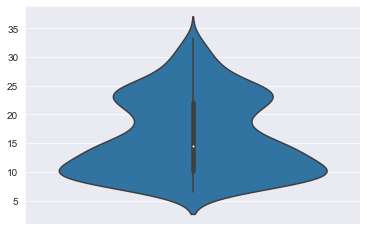

In [57]:
sns.violinplot(y=cell_non_zero)

<AxesSubplot:>

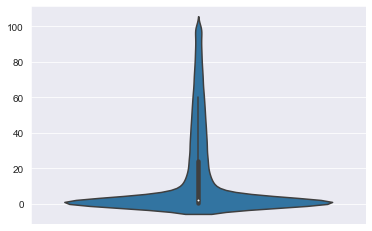

In [58]:
sns.violinplot(y=gene_non_zero)

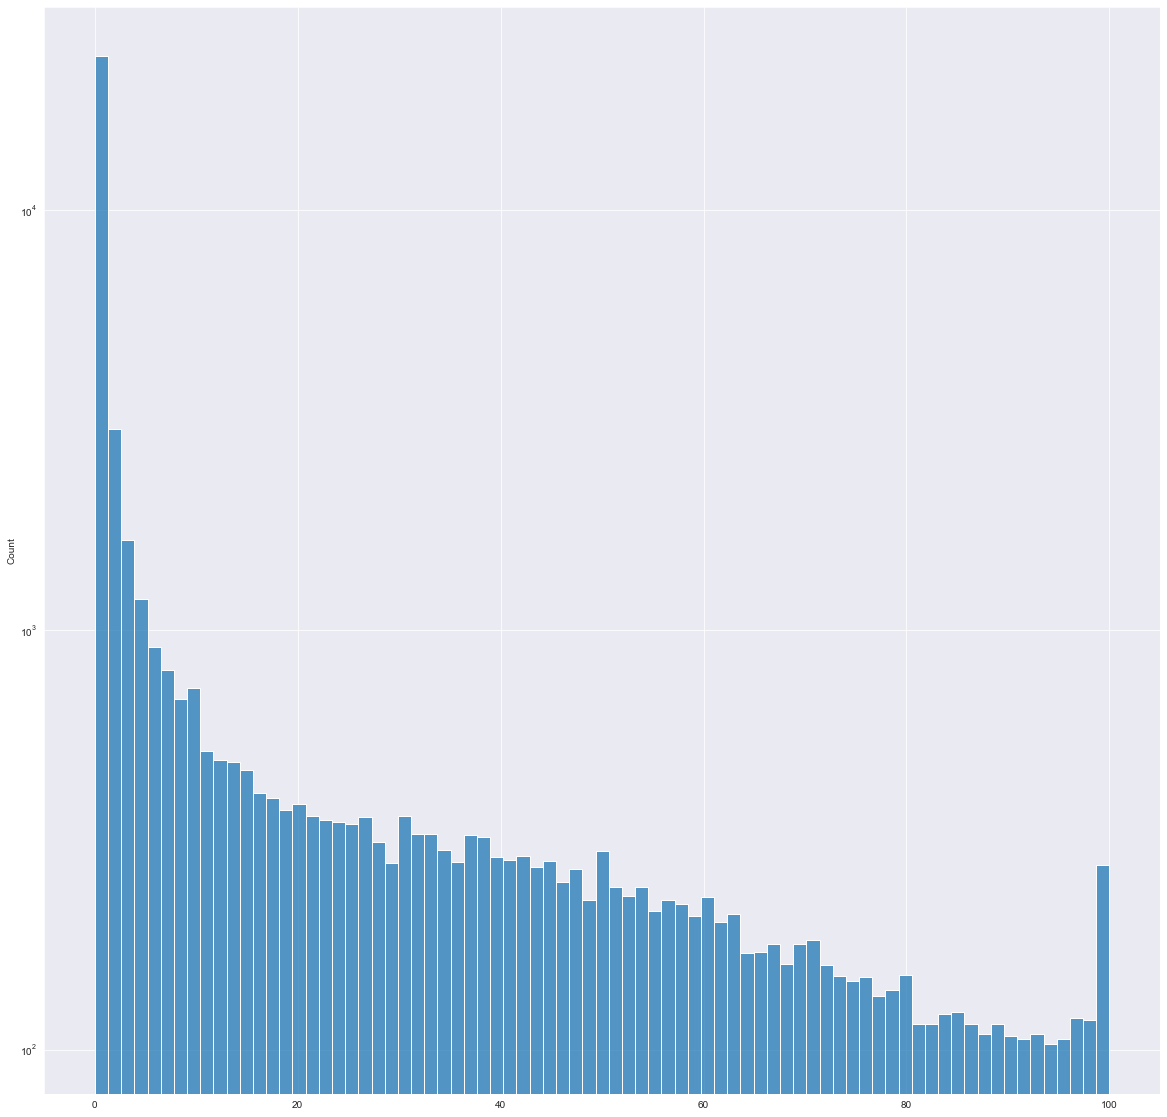

In [59]:
sns.set_style('darkgrid')
plt.figure(figsize=(20, 20))
g = sns.histplot(data=gene_non_zero, log_scale=(False, True))

In [60]:
details = gene_counts.iloc[:500].copy(deep=True)

<Figure size 24000x24000 with 0 Axes>

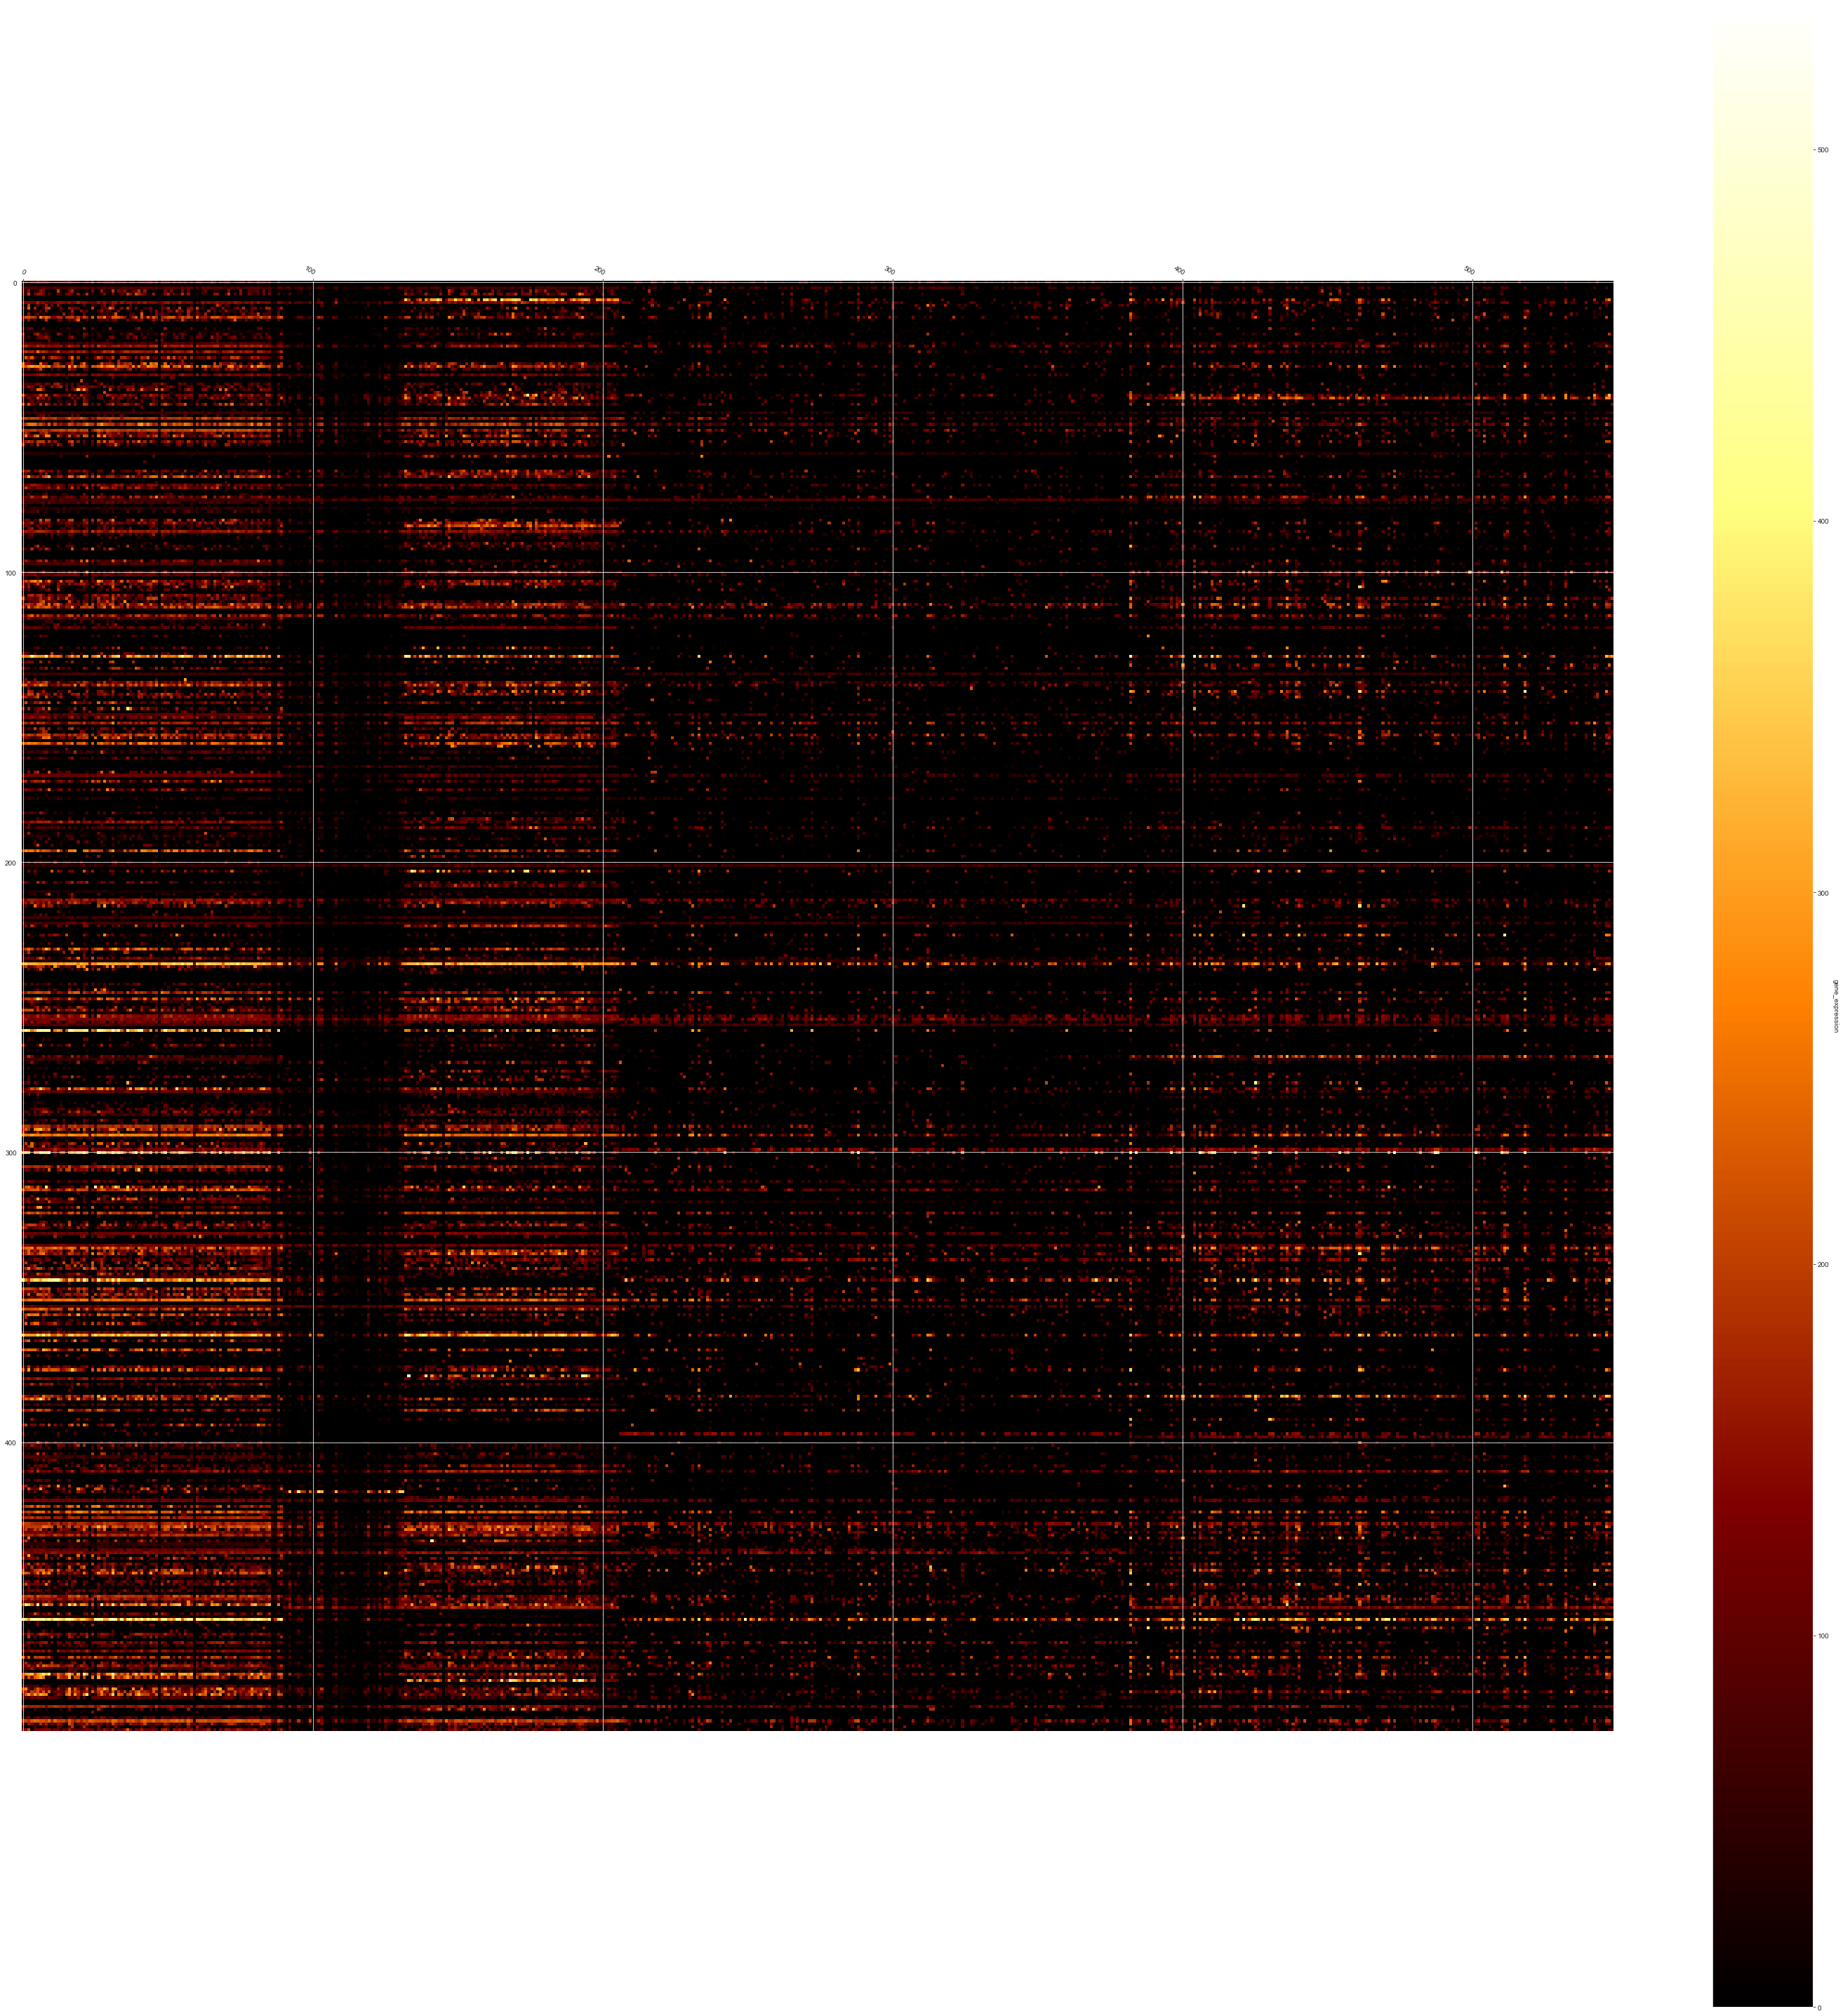

In [61]:
importlib.reload(utils)

plt.rcParams['figure.figsize'] = (40, 40)
plt.figure(dpi=600)
fig, ax = plt.subplots()
im, cbar = utils.heatmap(details, [], [], ax=ax,
                         cmap='afmhot', cbarlabel='gene_expression')
fig.tight_layout()
plt.show()
# plt.savefig('heatmap_full.jpg', format='jpg')

### ATAC

In [62]:
peaks = pd.read_csv(f'{path}/ATAC/counts.txt', sep='\t',
                    index_col=0)
gene_counts.head(10)

,scCAT_HCT116_Batch1_1,scCAT_HCT116_Batch1_2,scCAT_HCT116_Batch1_3,scCAT_HCT116_Batch1_4,scCAT_HCT116_Batch1_5,scCAT_HCT116_Batch1_6,scCAT_HCT116_Batch1_7,scCAT_HCT116_Batch1_8,scCAT_HCT116_Batch1_9,scCAT_HCT116_Batch1_10,...,scCAT_PDX2_Batch4_29,scCAT_PDX2_Batch4_30,scCAT_PDX2_Batch4_31,scCAT_PDX2_Batch4_32,scCAT_PDX2_Batch4_33,scCAT_PDX2_Batch4_34,scCAT_PDX2_Batch4_35,scCAT_PDX2_Batch4_36,scCAT_PDX2_Batch4_37,scCAT_PDX2_Batch4_38
ENSG00000000003,26,120,55,119,96,153,115,135,144,98,...,1,45,0,6,129,1,0,0,1,0
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,69,84,80,84,85,71,68,97,81,72,...,2,9,0,66,0,0,0,75,0,2
ENSG00000000457,95,61,147,1,36,51,147,132,4,15,...,1,0,0,0,0,0,1,0,0,0
ENSG00000000460,55,67,204,1,126,156,154,126,1,80,...,0,0,0,4,0,0,0,0,1,0
ENSG00000000938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000971,0,0,0,0,0,0,0,0,0,0,...,1,2,2,174,0,1,1,197,272,23
ENSG00000001036,131,142,139,123,126,173,128,146,123,100,...,137,0,0,80,95,1,87,118,88,0
ENSG00000001084,0,11,197,1,0,106,10,69,158,0,...,2,0,3,0,0,2,0,96,0,0
ENSG00000001167,91,37,240,0,171,0,2,72,179,199,...,107,0,0,10,0,131,3,0,0,0


In [63]:
a = ['_'.join(i.split('_')[:-1]) for i in gene_counts.columns]
print(sum('K562' in i for i in a))
print(sum('HCT116' in i for i in a))
print(sum('HeLa-S3' in i for i in a))
print(sum('PDX1' in i for i in a))
print(sum('PDX2' in i for i in a))
b = list(set(a))
sorted(b)

74
90
42
176
167


['scCAT_HCT116_Batch1',
 'scCAT_HCT116_Batch2',
 'scCAT_HeLa-S3_Batch1',
 'scCAT_HeLa-S3_Batch2',
 'scCAT_K562_Batch1',
 'scCAT_K562_Batch2',
 'scCAT_PDX1_Batch1',
 'scCAT_PDX1_Batch2',
 'scCAT_PDX1_Batch3',
 'scCAT_PDX1_Batch4',
 'scCAT_PDX2_Batch1',
 'scCAT_PDX2_Batch2',
 'scCAT_PDX2_Batch3',
 'scCAT_PDX2_Batch4']

In [67]:
peak_non_zero = (peaks != 0).sum(axis=1) / peaks.shape[1] * 100
peak_all_zero = peak_non_zero == 0

cell_non_zero = (gene_counts != 0).sum() / gene_counts.shape[0] * 100
cell_all_zero = cell_non_zero == 0

In [71]:
print(peak_non_zero.describe())
print()
print(peak_all_zero.describe())
print()
print(cell_non_zero.describe())
print()
print(cell_all_zero.describe())

count    157358.000000
mean         20.615500
std          18.933452
min           4.918033
25%           7.650273
50%          12.932605
75%          25.683060
max          96.721311
dtype: float64

count     157358
unique         1
top        False
freq      157358
dtype: object

count    549.000000
mean      16.155430
std        6.754158
min        6.488106
25%       10.230539
50%       14.492754
75%       22.161071
max       33.296643
dtype: float64

count       549
unique        1
top       False
freq        549
dtype: object


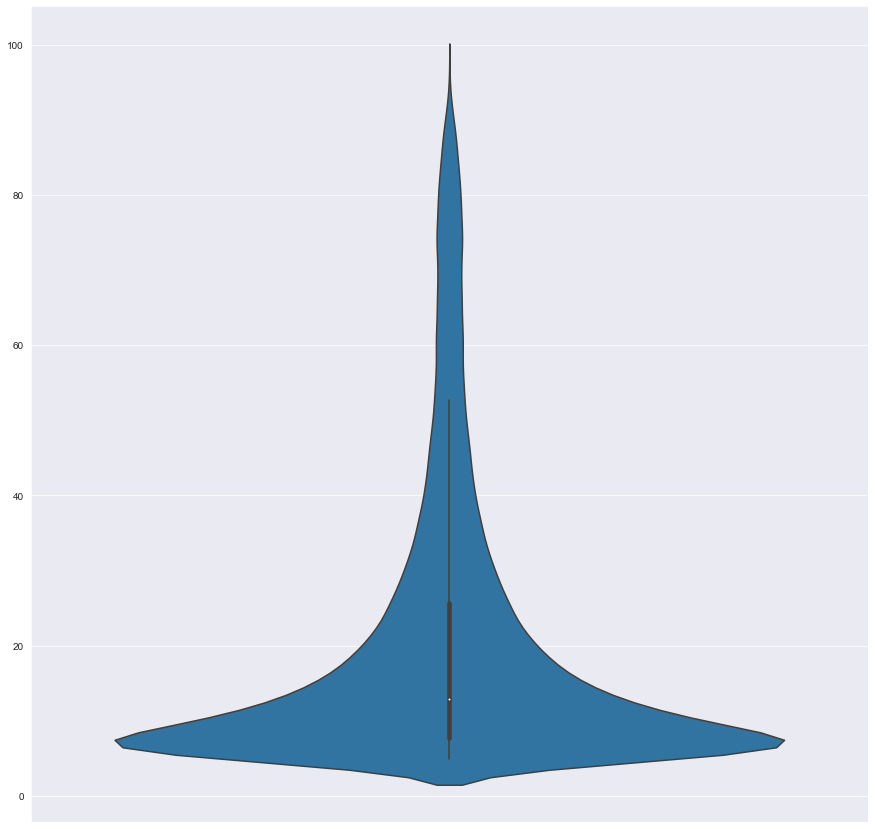

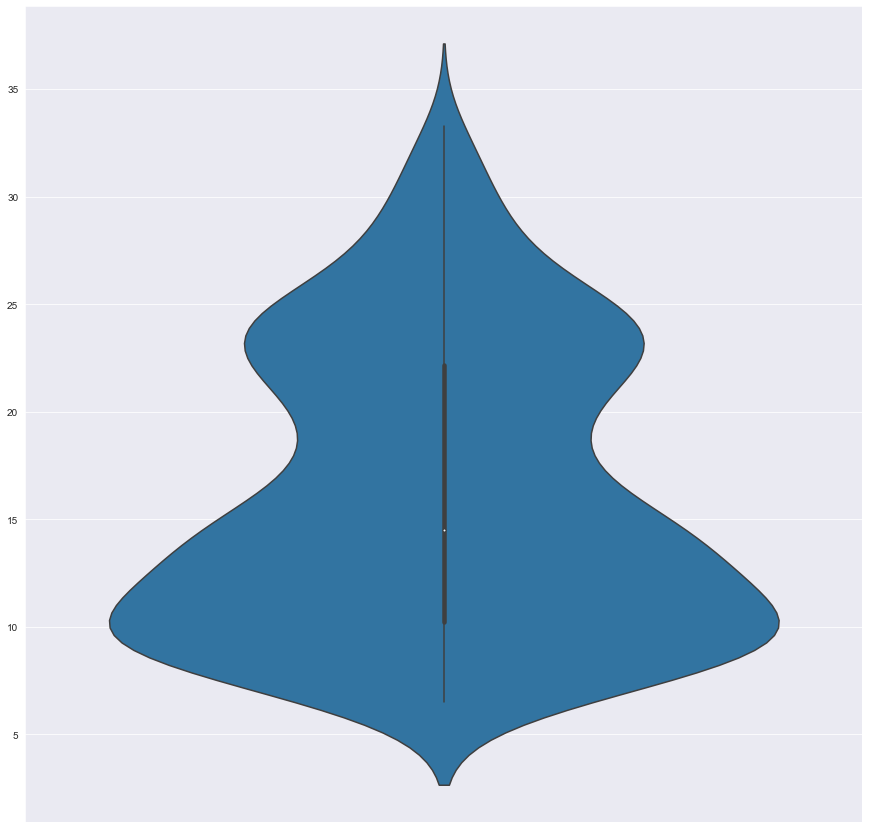

<Figure size 1080x1080 with 0 Axes>

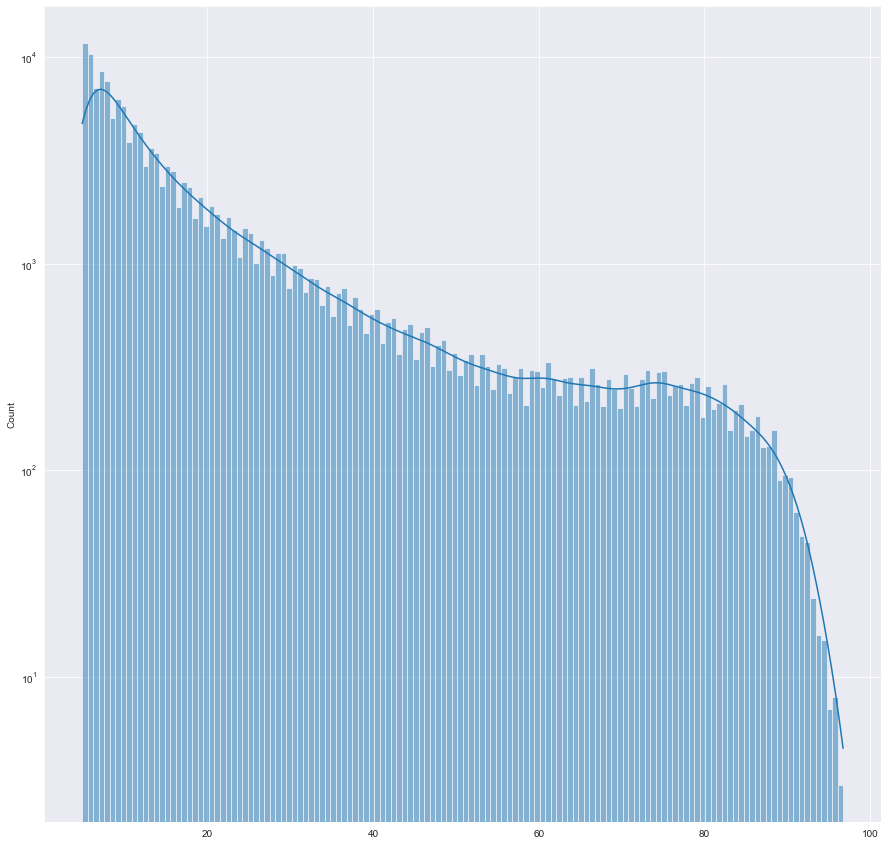

In [112]:
plt.figure(figsize=(15, 15))
sns.violinplot(y=peak_non_zero)
plt.show()

plt.figure(figsize=(15, 15))
sns.violinplot(y=cell_non_zero)
plt.show()

plt.figure(figsize=(15, 15))
sns.set_style('darkgrid')
plt.figure(figsize=(15, 15))
sns.histplot(data=peak_non_zero, log_scale=(False, True), kde=True)
plt.show()

<AxesSubplot:>

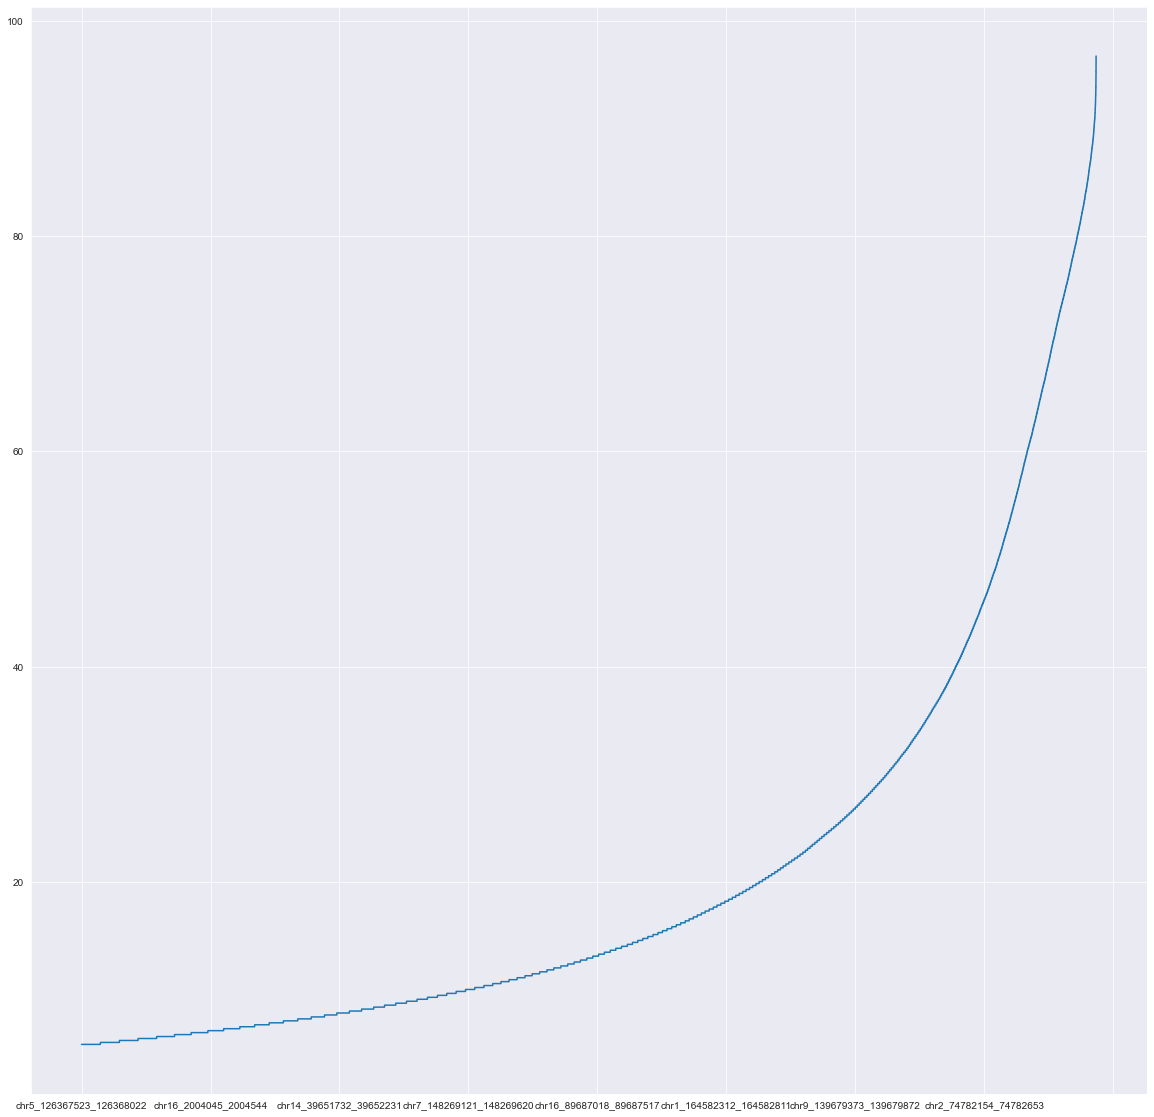

In [113]:
peak_non_zero.sort_values().plot(kind='line')

<Figure size 12000x12000 with 0 Axes>

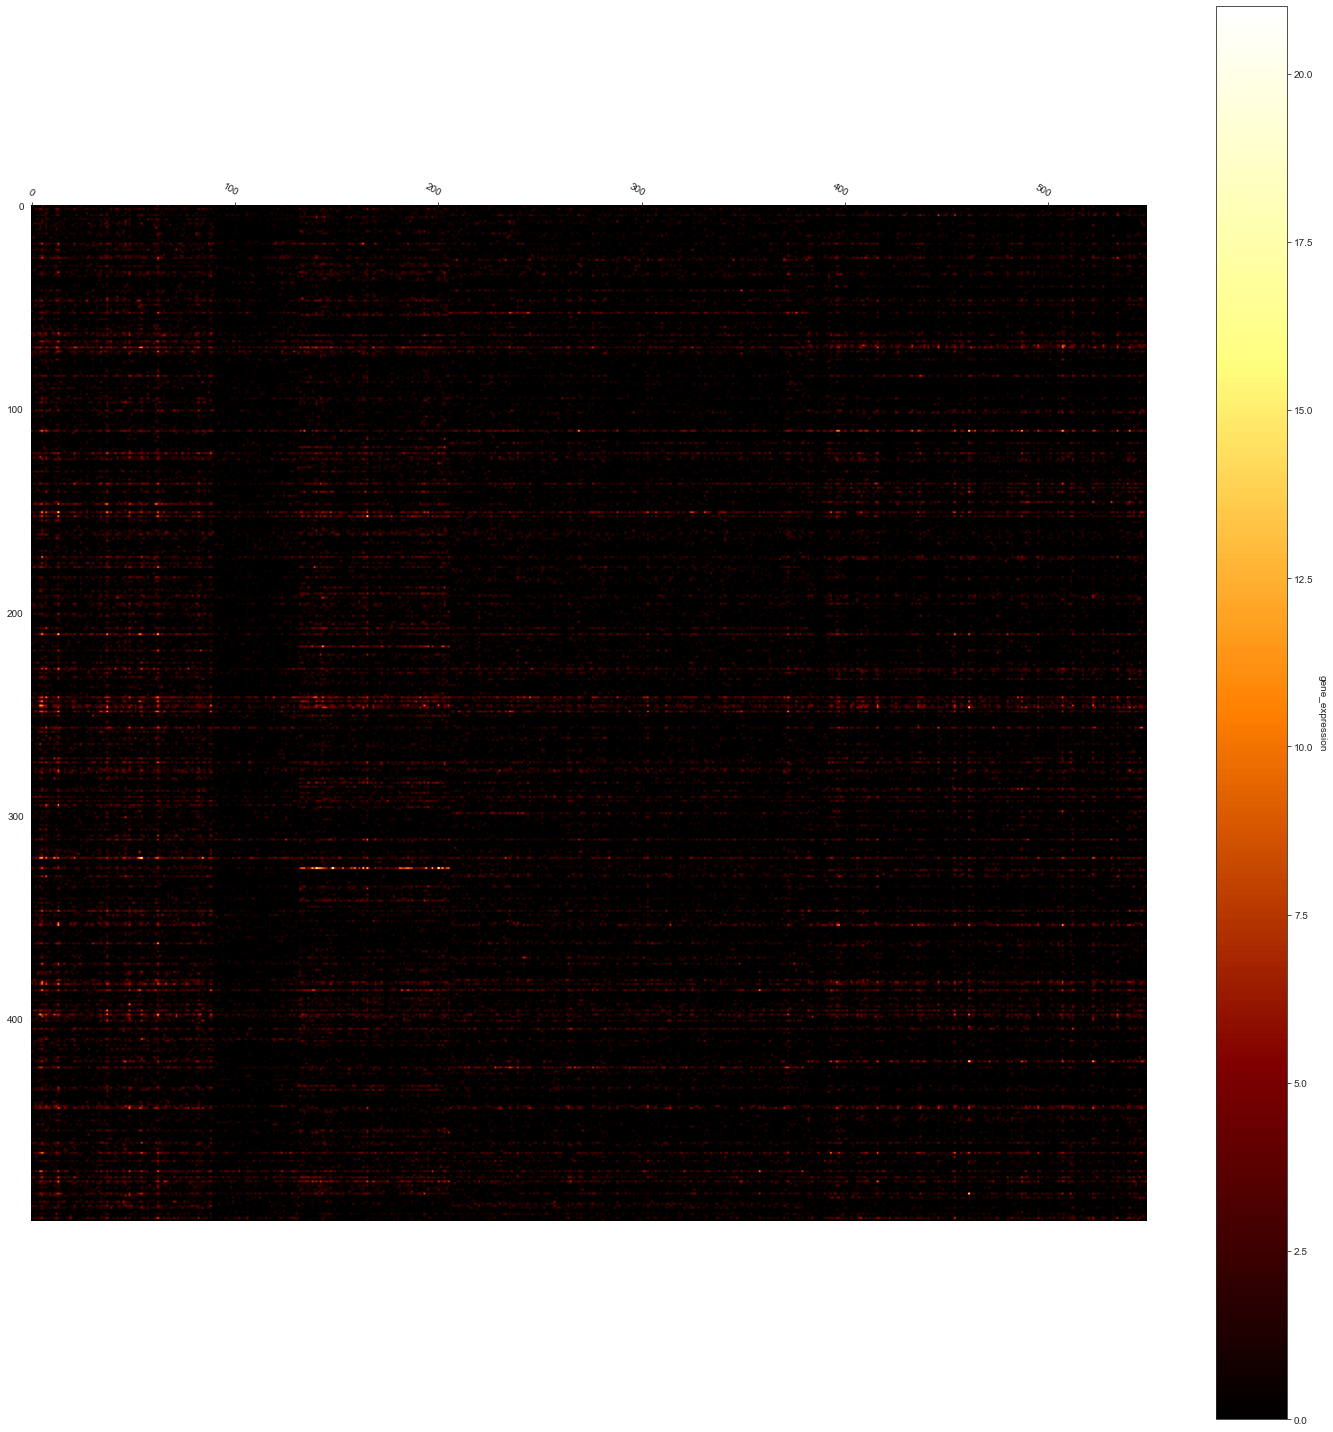

In [99]:
importlib.reload(utils)
sns.set_style('white')
plt.rcParams['figure.figsize'] = (20, 20)
plt.figure(dpi=600)
details = peaks.sample(500)
fig, ax = plt.subplots()
im, cbar = utils.heatmap(details, [], [], ax=ax,
                         cmap='afmhot', cbarlabel='gene_expression')
fig.tight_layout()
plt.show()

# RNAs

In [118]:
import os

samples = os.listdir('data/processed')
samples = samples[1:6] + samples[7:]
rnas = ['matrix.mtx', 'matrix.mtx', 'matrix.mtx', 'counts.txt', 'counts.txt', 'matrix.mtx.gz', 'counts.txt.gz', 'matrix.mtx.gz', 'counts.mtx.gz', 'counts.mtx.gz', 'counts.mtx.gz']

['Paired-seq_Adult-Cerebral-Cortex',
 'Paired-seq_Cell-Mix-matrix',
 'Paired-seq_Fetal-Forebrain',
 'scCAT-seq_cellline',
 'scCAT-seq_embryo',
 'sci-CAR_A549',
 'sci-CAR_A549_only',
 'sci-CAR_mouse_kidney',
 'SNARE-seq_AdBrainCortex',
 'SNARE-seq_CellLineMixture',
 'SNARE-seq_P0_BrainCortex']

In [153]:
for i, j in zip(samples, rnas):
    if 'txt' in j:
        df = pd.read_csv(f'data/processed/{i}/RNA/{j}', sep='\t')
    else:
        df = pd.read_csv(f'data/processed/{i}/RNA/{j}', sep=' ',
                         usecols=[0, 1, 2], skiprows=2,
                         names=['gene', 'cell', 'count'])
        matrix = np.zeros((df.gene.max(), df.cell.max()), np.int16)
        for row in df.itertuples(index=False):
            matrix[row.gene - 1][row.cell - 1] = row.count
        df = pd.DataFrame(matrix)
    print(df.head(10))

   0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   
5      0      0      0      0      0      0      0      0      0      0  ...   
6      0      0      0      0      0      0      0      0      0      0  ...   
7      0      0      0      0      0      0      0      0      0      0  ...   
8      0      0      0      0      0      0      0      0      0      0  ...   
9      0      0      0      0      0      0      0      0      0      0  ...   

   15181  15182  15183  15184  15185  15186  15187  15188  15189  15190  
0      0      0      0      0      0      0  

FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/sci-CAR_A549_only/RNA/counts.mtx.gz'

In [148]:
df = pd.read_csv(f'data/processed/{samples[2]}/RNA/{rnas[2]}', sep=' ', usecols=[0, 1, 2], skiprows=2, names=['gene', 'cell', 'count'])

In [149]:
df.head()

,gene,cell,count
0,1,418,1
1,1,429,1
2,1,553,1
3,1,602,1
4,1,624,1
